In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [88]:
df=pd.read_csv("titanic.csv")

In [89]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [91]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [92]:
df["age"].fillna(data["age"].mean(),inplace=True)

In [93]:
df.drop(['body','cabin'],1,inplace=True)

In [94]:
df.dropna(axis=0,thresh=4)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,S,2,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.000000,0.0,0.0,19952,26.5500,S,3,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1.0,0.0,13502,77.9583,S,10,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.000000,0.0,0.0,112050,0.0000,S,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2.0,0.0,11769,51.4792,S,D,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.000000,0.0,0.0,PC 17609,49.5042,C,NaN,"Montevideo, Uruguay"


In [95]:
df["pclass"].mode()

0    3.0
dtype: float64

In [96]:
df["pclass"].fillna(df["pclass"].mode()[0],inplace=True)

In [97]:
df["survived"].fillna(df["survived"].mode()[0],inplace=True)

In [98]:
df["name"].fillna(df["name"].mode()[0],inplace=True)

In [99]:
df["sex"].fillna(df["sex"].mode()[0],inplace=True)

In [100]:
df["sibsp"].fillna(df["sibsp"].mode()[0],inplace=True)

In [101]:
df["parch"].fillna(df["parch"].mode()[0],inplace=True)

In [102]:
df["ticket"].fillna(df["ticket"].mode()[0],inplace=True)

In [103]:
df["fare"].fillna(df["fare"].mean(),inplace=True)

In [104]:
df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)

In [105]:
df["boat"].fillna(df["boat"].mode()[0],inplace=True)

In [106]:
df["home.dest"].fillna(df["home.dest"].mode()[0],inplace=True)

In [107]:
df.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
boat         0
home.dest    0
dtype: int64

In [108]:
df["ticket"] = df['ticket'].apply(pd.to_numeric, errors='coerce') 

In [109]:
df["ticket"].fillna(df["ticket"].mode()[0],inplace=True)

In [110]:
df.dtypes

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket       float64
fare         float64
embarked      object
boat          object
home.dest     object
dtype: object

In [111]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

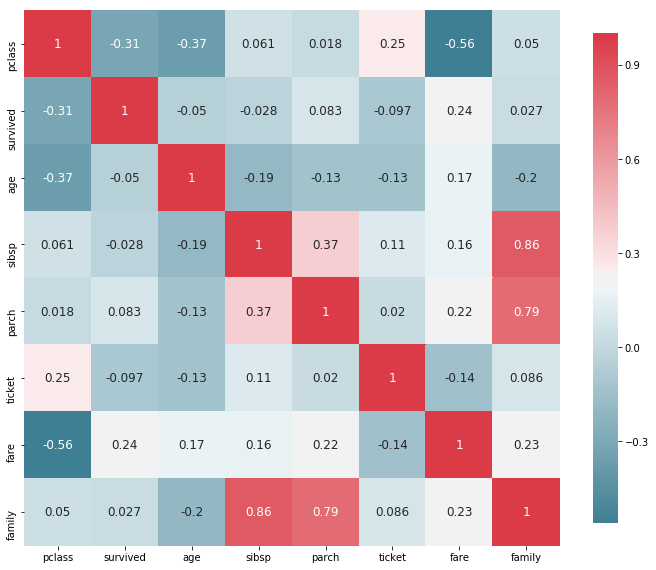

In [112]:
plot_correlation_map(data)

In [113]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['pclass']=encoder.fit_transform(data['pclass'])

In [114]:
df[['pclass','survived']].groupby(['pclass'],as_index=True).mean()

,survived
pclass,
0,0.619195
1,0.429603
2,0.254930


In [115]:
df['names']=pd.DataFrame(data.name.str.split(',',expand=True)[:][1].str.split('.',expand=True)[:][0])

In [116]:
df.names

0          Miss
1        Master
2          Miss
3            Mr
4           Mrs
5            Mr
6          Miss
7            Mr
8           Mrs
9            Mr
10          Col
11          Mrs
12          Mme
13         Miss
14           Mr
15           Mr
16           Mr
17          Mrs
18         Miss
19           Mr
20           Mr
21          Mrs
22           Mr
23         Miss
24         Miss
25           Mr
26           Mr
27          Mrs
28         Miss
29           Mr
         ...   
1280         Mr
1281         Mr
1282         Mr
1283         Mr
1284         Mr
1285         Mr
1286        Mrs
1287         Mr
1288         Mr
1289         Mr
1290        Mrs
1291         Mr
1292         Mr
1293         Mr
1294         Mr
1295         Mr
1296         Mr
1297         Mr
1298         Mr
1299         Mr
1300        Mrs
1301         Mr
1302         Mr
1303         Mr
1304       Miss
1305       Miss
1306         Mr
1307         Mr
1308         Mr
1309       Miss
Name: names, Length: 131

In [117]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }
df['names']=df['names'].str.strip()
df['names']=df['names'].map(Title_Dictionary)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,home.dest,names
0,0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160.0,211.3375,S,2,"St Louis, MO",Miss
1,0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.5500,S,11,"Montreal, PQ / Chesterville, ON",Master
2,0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781.0,151.5500,S,13,"Montreal, PQ / Chesterville, ON",Miss
3,0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781.0,151.5500,S,13,"Montreal, PQ / Chesterville, ON",Mr
4,0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781.0,151.5500,S,13,"Montreal, PQ / Chesterville, ON",Mrs


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


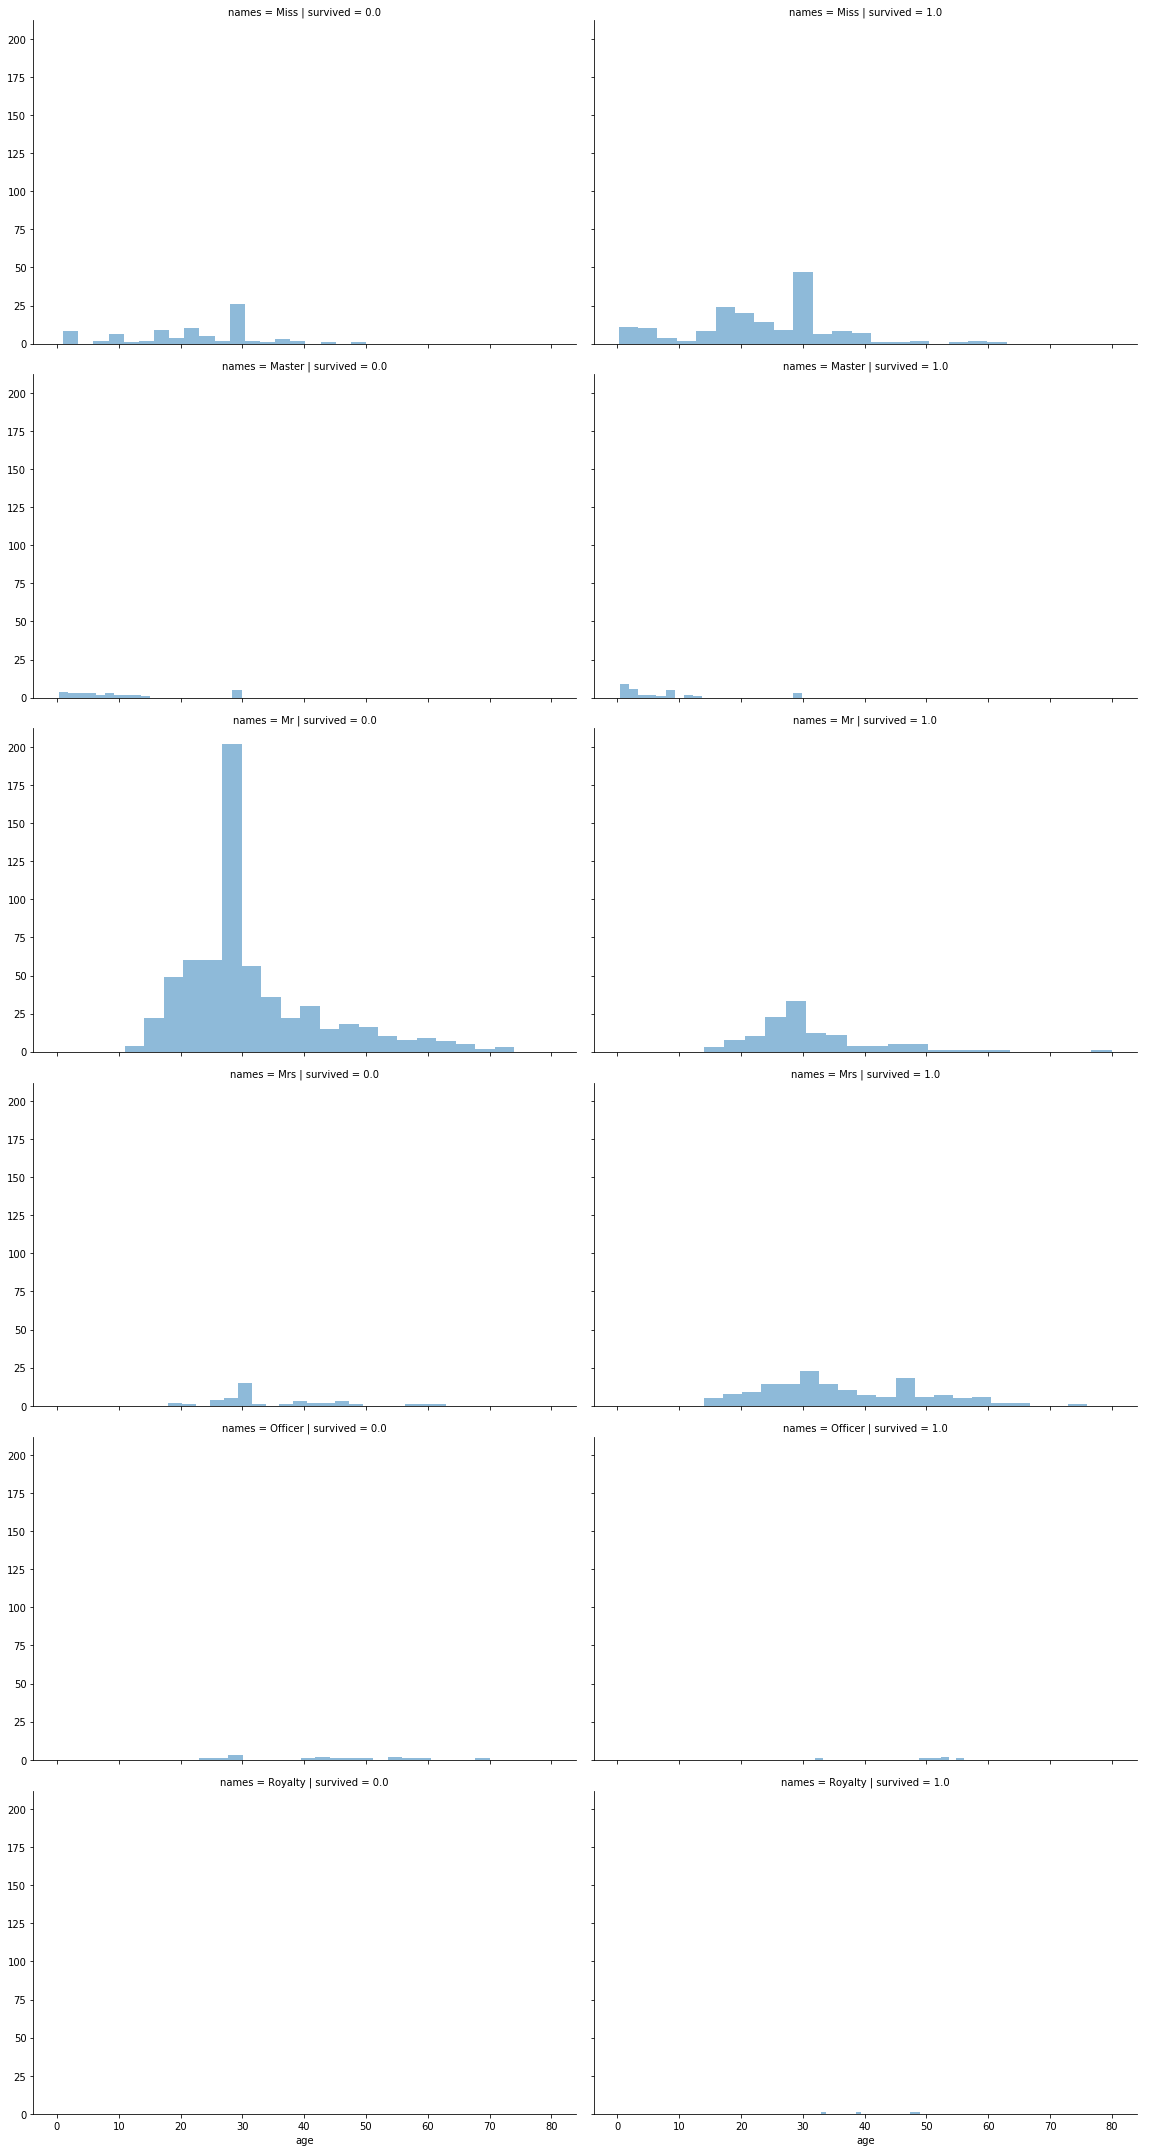

In [118]:
grid = sns.FacetGrid(df,col='survived', 
    row='names', size=5, aspect=1.6)
grid.map(plt.hist,'age', alpha=.5, bins=20)
grid.add_legend()

In [119]:
familysize=pd.DataFrame()
familysize['family']=df['parch']+df['sibsp']
familysize.head()

,family
0,0.0
1,3.0
2,3.0
3,3.0
4,3.0


In [120]:
df['family']=familysize

In [121]:
grid = sns.catplot(df=df,x='family',y='survived',kind="bar")

ValueError: Could not interpret input 'family'

In [ ]:
grid = sns.catplot(df=df,x='pclass',y='survived',kind="bar")

In [ ]:
grid = sns.catplot(df=df,x='sex',y='survived',kind="bar")

In [ ]:
grid = sns.catplot(df=df,x='names',y='survived',kind="bar")

In [ ]:
pd.DataFrame({'Survivor' : df.groupby('survived').get_group(1).fare,
              'Non-Survivors': df.groupby('survived').get_group(0).fare}).plot.hist(stacked=True, alpha=.6, bins=30, figsize = (15,20))

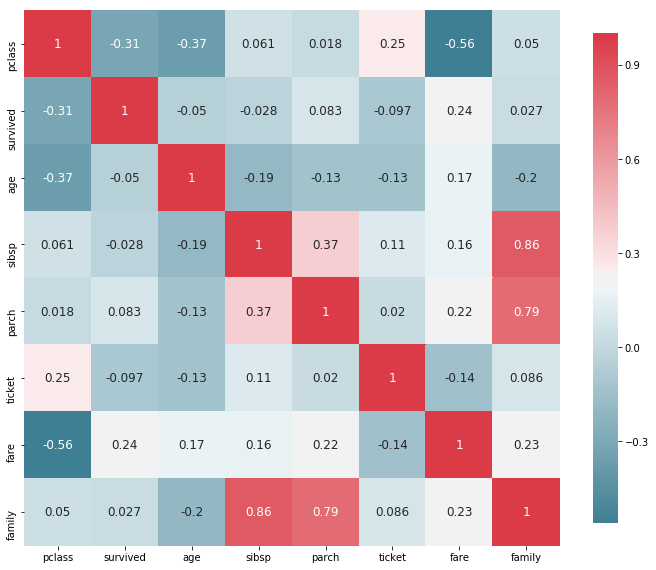

In [122]:
plot_correlation_map(df)

In [123]:
x=df[["age","ticket","fare"]]
y=df["survived"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=65) 

logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)   
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))
print(pd.crosstab(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy=0.72
col_0     0.0  1.0
survived          
0.0       157   12
1.0        61   32
              precision    recall  f1-score   support

         0.0       0.72      0.93      0.81       169
         1.0       0.73      0.34      0.47        93

   micro avg       0.72      0.72      0.72       262
   macro avg       0.72      0.64      0.64       262
weighted avg       0.72      0.72      0.69       262



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
